<a href="https://colab.research.google.com/github/AnastaSya73/lalala/blob/main/%D0%9B%D0%B0%D0%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('/content/c_0000.csv')
df # чтение файла

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5
...,...,...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016,63996
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016,63997
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016,63998
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016,63999


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

1.

In [3]:
df.info()# your_code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       64000 non-null  float64
 1   y       64000 non-null  float64
 2   z       64000 non-null  float64
 3   vx      64000 non-null  float64
 4   vy      64000 non-null  float64
 5   vz      64000 non-null  float64
 6   m       64000 non-null  float64
 7   id      64000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.9 MB


In [4]:
df.drop('id', axis= 1 , inplace= True )
df

,x,y,z,vx,vy,vz,m
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016
...,...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357,0.000016
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824,0.000016
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062,0.000016
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334,0.000016


In [5]:
Q1 = df["m"].quantile(0.25)
Q3 = df['m'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df["m"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: []


In [6]:
df.m.describe()

count    6.400000e+04
mean     1.562500e-05
std      6.776317e-21
min      1.562500e-05
25%      1.562500e-05
50%      1.562500e-05
75%      1.562500e-05
max      1.562500e-05
Name: m, dtype: float64

In [7]:
df.drop('m', axis= 1 , inplace= True )
df

,x,y,z,vx,vy,vz
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565
...,...,...,...,...,...,...
63995,-0.515370,0.834457,1.609291,0.317309,0.082150,-0.514357
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334


In [8]:
Q1 = df["x"].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df["x"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: [1.5021045, 2.241766, 2.3555684, 2.1353664, -4.214149, 1.8203616, 1.4304693, -1.6837348, 2.0528893, 1.4739195, 1.4634396, -1.4572583, 2.0727623, -1.5368557, -2.5023537, 1.9145894, -3.3531818, -1.6968815, 2.4543476, 2.4712777, -1.9997615, 1.7103184, -1.7270395, 2.1708076, 1.7393253, -1.3610587, 1.8131627, 1.6778476, 1.5869766, -1.4173458, -3.612592, 2.702821, -2.5796888, 1.5196189, 2.0685723, -1.5034708, 1.39428, 1.4721574, -2.1937571, 1.5750757, 2.0538263, -1.8657866, 1.8547716, 1.8720882, -1.5263776, -2.3209281, -1.9578295, 1.4395026, 1.4548718, 1.6567512, 1.5681245, -3.4275265, 2.7876871, -1.628058, 3.4171493, 1.4267452, -1.5404841, -2.2288616, -1.4506986, -1.6831814, 2.6251528, -2.6352663, -1.5022297, 1.62893, -2.1358991, -2.0327783, 1.8883003, -1.553695, -1.3755243, 1.9321398, -2.0783205, -2.5279777, -1.6448098, -2.7031076, 1.8070656, 1.8669837, 1.5179559, 1.36085, -1.859669, 3.7612226, -1.7642395, -1.3519239, -1.3459151, -2.6166286, 2.288274, -1.4137769, 1.3

In [9]:
Q1 = df["y"].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df["y"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: [1.4429832, -1.4016269, 2.3423939, 1.6278776, 1.4702883, 3.6757843, 2.0360968, 1.5021782, -2.3377211, 1.4249339, 1.3489025, -2.431567, -1.653003, 1.6374118, 1.5776324, -1.4811603, 1.5003377, 1.827185, 2.7753572, 2.3347743, 2.4209087, -1.493486, 2.4437146, -2.2928276, 1.5848699, 1.770468, 1.7611288, 2.373394, 1.4398057, 1.8339612, 1.6860836, 1.6513312, 1.9328406, 2.1719522, 1.8990886, 2.5823071, 1.7517148, 1.3366485, 1.3480362, -2.1014841, 1.382818, -1.9139714, -3.2454505, 2.3234854, 1.6255363, 2.3266041, -1.3689588, 1.994722, -1.3400304, 1.5074914, 2.3482797, 1.7354804, 1.3615853, 1.5900074, 1.3363308, -2.51807, -3.5431364, -1.4414082, 2.0555191, 2.9307752, 1.3607857, 3.244899, 1.440836, -1.5817797, 1.5356884, 1.4143672, 2.6783676, -2.4918113, -3.1098459, -1.7218479, 2.2067089, 1.6543564, -1.5664502, -1.7979611, -1.9756019, 1.3823467, 2.2283037, -1.6551186, 1.8799912, 1.5636743, 1.7872093, 1.7091479, -2.6942461, 1.7270532, 1.9034152, 2.6645997, 1.7337976, 1.87028

In [10]:
Q1 = df["z"].quantile(0.25)
Q3 = df['z'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df["z"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: [1.449747, -1.5989462, 1.5577402, 1.7356175, 1.6072628, -1.6665099, -1.6710527, 2.1873145, -1.3632797, -1.5576919, -1.879793, 2.3298178, 1.5795006, 2.3184638, -1.7758552, -1.7914851, -1.4939466, 2.8135836, -1.7640435, -1.8024474, -1.4900873, -3.5111299, -2.3482018, 1.5883271, 1.3391527, 2.7310872, -1.6568969, 2.1833978, -2.1128249, 2.8505852, 1.3643506, -1.4230119, 1.3551643, -3.1227126, -1.8708931, 1.3455557, -2.5399623, 1.8455604, 1.9957454, -2.5121758, 1.348758, 1.6848879, 1.8017198, -2.606153, -1.7078264, -1.6390141, -1.79921, -1.9205855, -1.7340815, 2.4740119, -1.735415, 1.3459489, -1.699571, -1.5130427, 2.7136588, 1.6213906, 1.4819425, 1.7936195, 1.7520599, 1.5036527, -1.9130427, 1.4211437, -1.507073, -2.8544979, 1.7142411, 1.4486279, 1.692318, 1.4370986, 2.2388995, -2.2791634, -2.3643265, -1.6943825, 2.3611555, 1.4210055, -2.7150192, -2.1901443, 3.091949, 1.9840951, 1.4150677, -1.9916263, -1.4852116, 1.4488131, -1.6958894, 2.0025032, -2.9575365, -2.4745007

In [11]:
Q1 = df["vx"].quantile(0.25)
Q3 = df['vx'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df["vx"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: [-1.3277174, 1.1730647, 1.15377, 1.4624324, 1.1501149, -1.1509962, 1.0896789, -1.0856341, -1.130777, -1.1000506, 1.1760651, 1.1824211, 1.083079, -1.277751, -1.1416372, -1.2395443, -1.2421478, 1.0818957, 1.1928267, -1.2522023, 1.2387792, -1.116652, -1.1604278, -1.4862616, -1.118318, -1.1473422, 1.2249156, 1.2353021, 1.1141367, 1.2356457, -1.1098379, 1.2128969, 1.1567291, 1.0979407, -1.1694316, 1.186896, -1.1622119, 1.2899905, -1.1479475, 1.220607, 1.2744678, 1.2593098, 1.1901252, -1.1689879, 1.14905, -1.2021697, 1.3387661, -1.0958449, 1.1623943, -1.0791054, 1.1443886, -1.1171483, -1.1716715, 1.1612321, -1.2258185, 1.1949204, 1.1188835, 1.1584964, -1.0839672, -1.2885194, -1.2910421, 1.0866481, 1.1142559, 1.1311909, 1.2579156, 1.173961, 1.1800935, -1.1738521, -1.1575826, 1.3947664, -1.096818, 1.077986, -1.3581066, -1.2068292, -1.2937306, -1.1308714, 1.143925, -1.1258657, -1.5194679, 1.1489155, -1.0974084, -1.3386538, -1.079697, 1.2322135, -1.1857109, 1.1516289, 1.18

In [12]:
Q1 = df["vy"].quantile(0.25)
Q3 = df['vy'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df["vy"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: [1.107815, -1.0940624, 1.5053834, 1.1431522, 1.3662769, -1.3588989, 1.1638639, 1.1260988, -1.4461886, 1.1843792, -1.248283, -1.1321597, 1.1666721, -1.1229376, -1.2494203, -1.2319343, -1.231251, 1.1558131, 1.104062, 1.0874116, -1.1212376, -1.2219656, -1.2741042, 1.2508858, -1.1774367, -1.4686768, 1.2846829, 1.3901607, 1.2190764, -1.0969679, -1.216521, -1.2589924, 1.1767921, -1.1180807, -1.0849807, 1.1319386, 1.1524978, -1.2234381, 1.1285744, -1.1223391, -1.1059029, -1.3800565, 1.1536561, -1.1983074, 1.1612523, -1.2699175, -1.2719259, -1.1838732, -1.1488189, 1.0849224, -1.1025646, 1.145833, -1.2398928, 1.1459455, 1.1508584, -1.205574, 1.514009, 1.13833, -1.1091413, 1.160323, -1.2919874, 1.2944292, 1.131122, -1.2152818, 1.3892057, 1.1342173, 1.170068, 1.1038886, 1.2821004, 1.3170686, -1.2790455, -1.1137428, -1.14003, -1.0856135, 1.1673514, -1.1394268, 1.2489023, -1.0993589, -1.1152128, -1.2514824, -1.128638, -1.1135854, 1.101037, 1.0976808, -1.13036, -1.1341542, 1.2

In [13]:
Q1 = df["vz"].quantile(0.25)
Q3 = df['vz'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers2 = [x1 for x1 in df["vz"] if ((x1 < lower) or (x1 > upper))]#При помощи межквартильного размаха

print("Потенциальные выбросы:", outliers2)

Потенциальные выбросы: [1.2245761, -1.1106941, 1.1376851, -1.2089292, -1.1527236, -1.0922798, -1.1795398, -1.2111089, 1.291996, -1.356879, -1.2336951, -1.1949632, -1.1556703, -1.1194417, 1.2479328, 1.1691916, -1.1546434, -1.2703327, 1.6006814, 1.2929167, 1.2234406, 1.3383125, -1.3115232, 1.2833618, 1.133505, 1.2581255, -1.1714054, -1.2376188, -1.2306695, -1.1996419, 1.2196795, -1.0976826, 1.0916924, -1.122497, -1.2138937, 1.2577596, -1.167912, 1.0941285, -1.3999643, -1.3936335, 1.2189442, -1.2295606, 1.1147141, 1.2129772, 1.1482629, 1.156314, 1.3495325, -1.2361279, 1.1339948, -1.1598082, -1.1587677, -1.2340423, 1.1246334, 1.2456728, -1.1791614, -1.1677819, 1.4006976, -1.1424243, -1.146356, -1.1852326, -1.1045443, 1.1485, -1.1738974, 1.2377985, 1.1735629, -1.4164822, -1.2037212, -1.1361277, 1.1021839, -1.1164167, 1.1790353, 1.1715016, -1.4159311, 1.2153904, 1.1442437, 1.1019231, -1.119655, -1.1089002, 1.1146246, -1.1106092, -1.1106801, 1.1196874, 1.2210695, 1.1910977, 1.256586, -1.12323

2.

In [14]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_clean

,x,y,z,vx,vy,vz
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565
5,-0.356017,-0.045705,0.335006,-0.709008,-0.649903,0.397949
7,-0.916657,0.643472,-0.146350,-0.511860,0.220190,-0.529937
...,...,...,...,...,...,...
63992,-0.179342,-0.850034,0.437947,0.462598,-0.117222,0.179451
63996,0.725611,-0.579058,0.973140,0.129194,-0.207819,0.259824
63997,-0.175569,-0.397390,0.163967,-0.137939,0.234582,-0.060062
63998,0.239999,0.625631,0.715540,-0.148245,0.351681,0.784334


<Axes: >

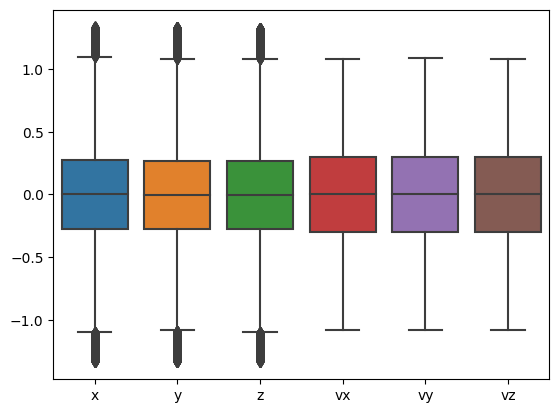

In [15]:
sns.boxplot(df_clean)

In [16]:
df_cluster = df_clean[["z","vz"]]
df_cluster

,z,vz
0,-0.531982,-0.322765
2,-0.390880,0.059251
4,-0.267264,-0.405565
5,0.335006,0.397949
7,-0.146350,-0.529937
...,...,...
63992,0.437947,0.179451
63996,0.973140,0.259824
63997,0.163967,-0.060062
63998,0.715540,0.784334


<Axes: >

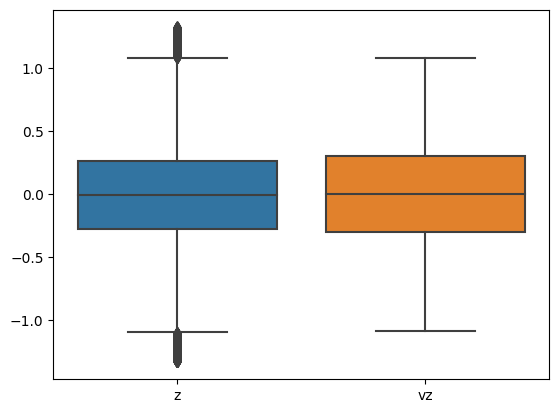

In [17]:
sns.boxplot(df_cluster)

In [18]:
df_cluster = df_cluster.sample(n=7000)
df_cluster

,z,vz
14648,0.332411,-0.449706
29646,-0.382865,0.118361
3466,-0.143908,-0.772410
18635,-0.040746,0.659820
63941,-0.144118,0.762089
...,...,...
59420,-0.115577,0.663913
8893,-0.069622,0.507330
41260,-0.651808,0.389885
56385,0.051942,-0.082059


<Axes: >

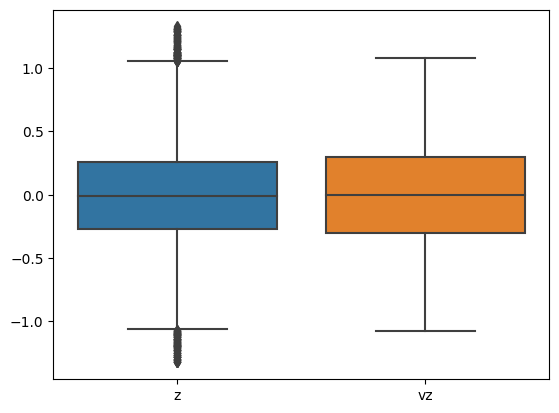

In [19]:
sns.boxplot(df_cluster)

In [20]:
Q1 = df_cluster.quantile(q=.25)
Q3 = df_cluster.quantile(q=.75)
IQR = df_cluster.apply(stats.iqr)

df_cluster1 = df_cluster[~((df_cluster < (Q1-1.5*IQR)) | (df_cluster > (Q3+1.5*IQR))).any(axis=1)]
df_cluster1

,z,vz
14648,0.332411,-0.449706
29646,-0.382865,0.118361
3466,-0.143908,-0.772410
18635,-0.040746,0.659820
63941,-0.144118,0.762089
...,...,...
59420,-0.115577,0.663913
8893,-0.069622,0.507330
41260,-0.651808,0.389885
56385,0.051942,-0.082059


<Axes: >

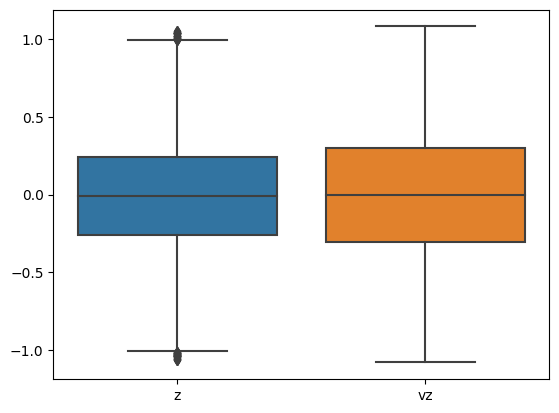

In [21]:
sns.boxplot(df_cluster1)

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

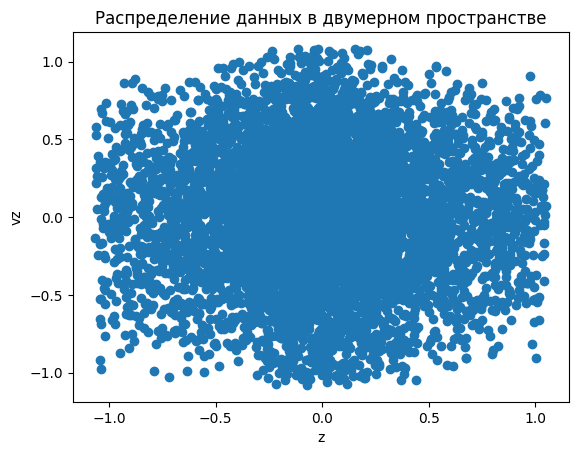

In [22]:
plt.scatter(df_cluster1["z"], df_cluster1["vz"])
plt.xlabel('z')
plt.ylabel('vz')
plt.title('Распределение данных в двумерном пространстве')

In [23]:
X = df_cluster1[["z", "vz"]]
X

,z,vz
14648,0.332411,-0.449706
29646,-0.382865,0.118361
3466,-0.143908,-0.772410
18635,-0.040746,0.659820
63941,-0.144118,0.762089
...,...,...
59420,-0.115577,0.663913
8893,-0.069622,0.507330
41260,-0.651808,0.389885
56385,0.051942,-0.082059


In [24]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_centers) # центры кластеров в двумерном пространстве

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.07664081 -0.33485596]
 [-0.09295634  0.33957545]]


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

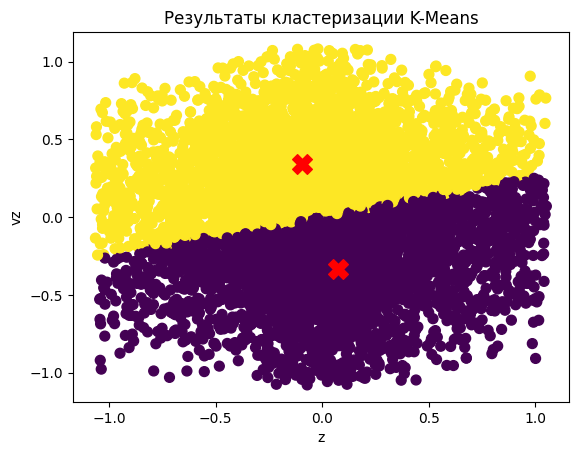

In [25]:
# Визуализируем результаты кластеризации двумерной кластеризации
plt.scatter(df_cluster1["z"], df_cluster1["vz"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('z')
plt.ylabel('vz')
plt.title('Результаты кластеризации K-Means')
plt.show()

Оптимальное число кластеров 4, с баллом 0.34676690136330784


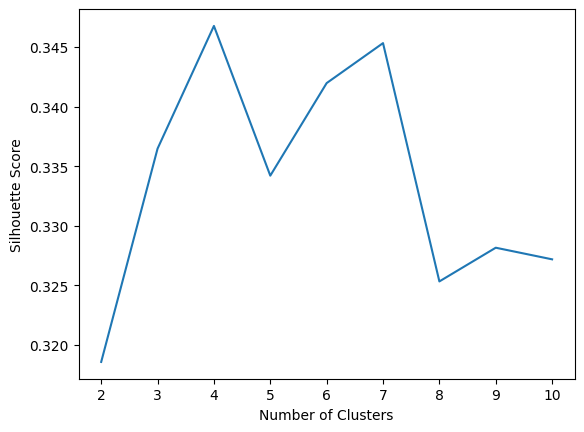

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Оптимальное число кластеров 7, с баллом 4511.771784357825


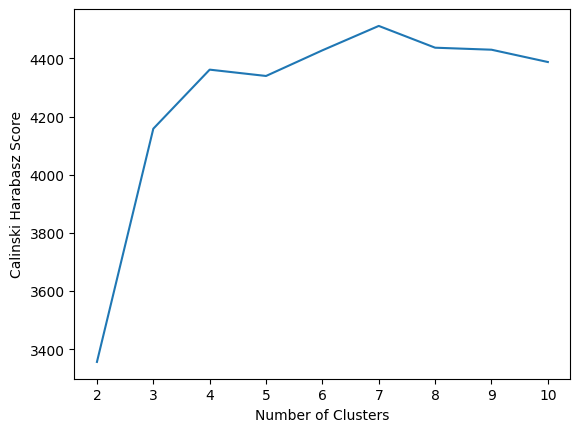

In [27]:
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

Оптимальное число кластеров 10, с баллом 0.8345532741098095


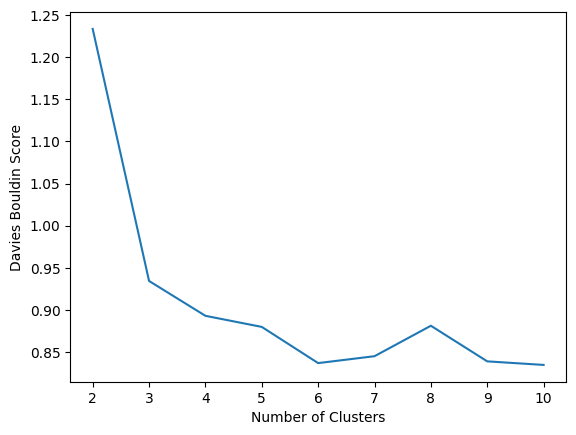

In [28]:
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = davies_bouldin_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

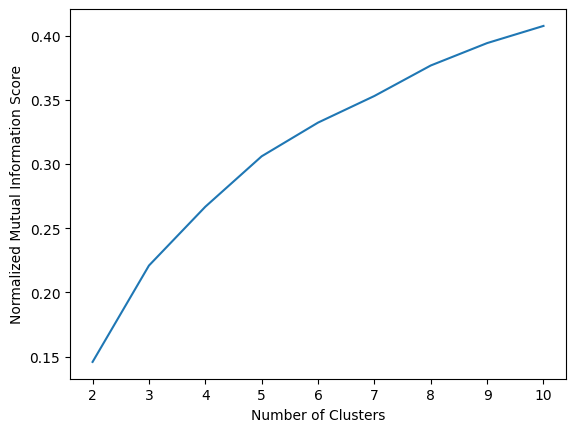

Оптимальное число кластеров 10, с баллом 0.4077039084421665


In [29]:
from sklearn.metrics import normalized_mutual_info_score

# Предположим, что y_true - это истинные метки
y_true = df_cluster1['z'].to_numpy()
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information Score')
plt.show()

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


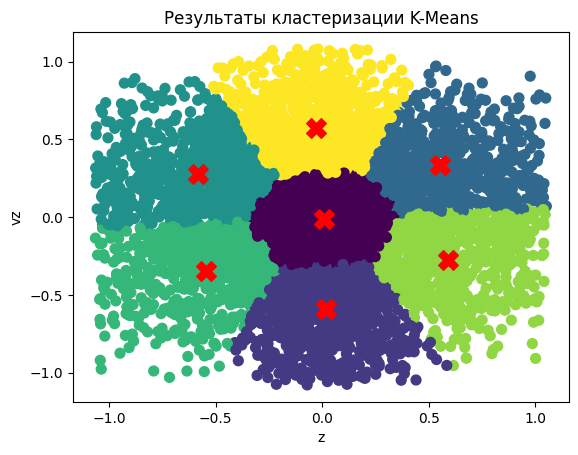

In [30]:
kmeans = KMeans(n_clusters=7)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Визуализируем результаты кластеризации
plt.scatter(df_cluster1["z"], df_cluster1["vz"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('z')
plt.ylabel('vz')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

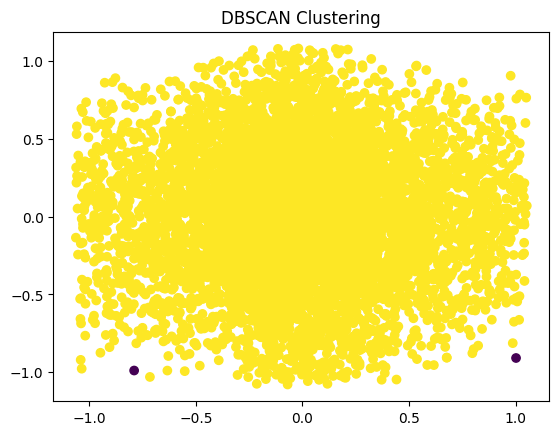

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

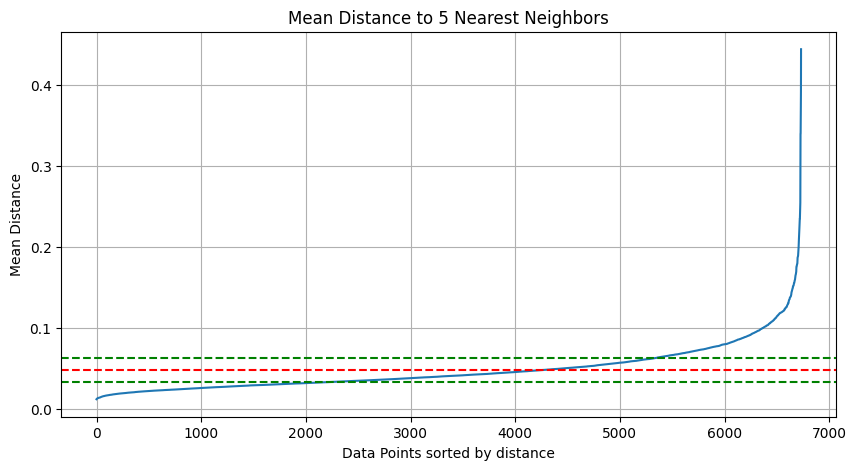

Оптимальный EPS = 0.04879221093160113


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')


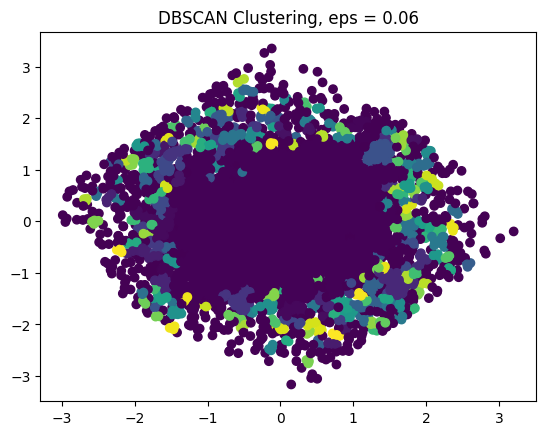

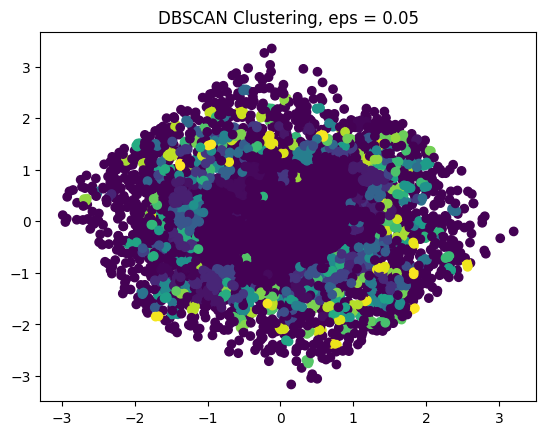

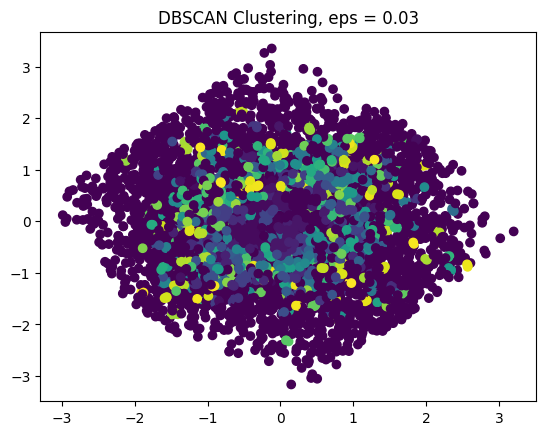

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

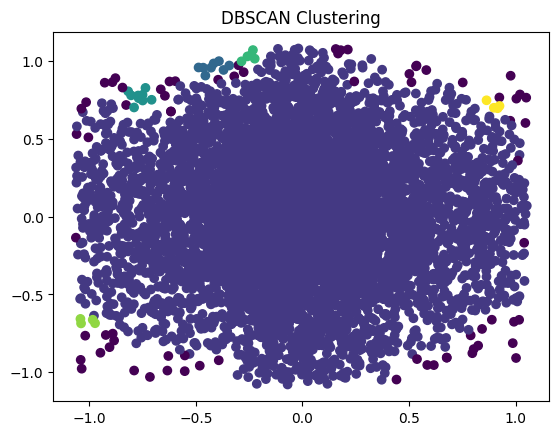

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

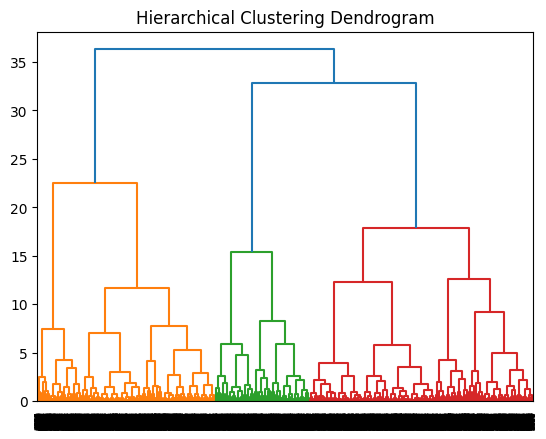

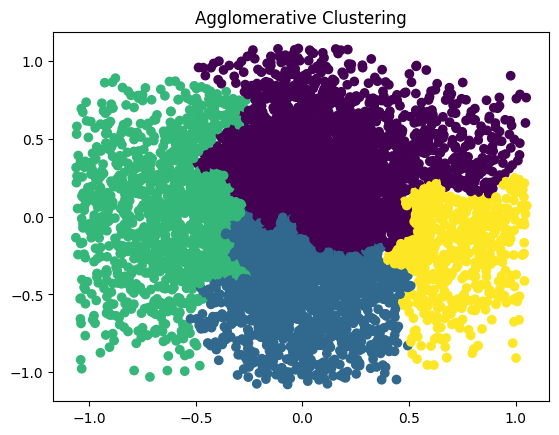

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [36]:
!pip install ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=de529eebf88cd6162309406189692f3972272b370d0ca3cee328410b8c1cf22f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [37]:
df_cluster1['kmeans_cluster'] = kmeans.labels_
df_cluster1['kmeans_cluster'] = df_cluster1.kmeans_cluster.astype('category')
df_cluster1

<ipython-input-37-cd5ec9855595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1['kmeans_cluster'] = kmeans.labels_
<ipython-input-37-cd5ec9855595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1['kmeans_cluster'] = df_cluster1.kmeans_cluster.astype('category')


,z,vz,kmeans_cluster
14648,0.332411,-0.449706,5
29646,-0.382865,0.118361,3
3466,-0.143908,-0.772410,1
18635,-0.040746,0.659820,6
63941,-0.144118,0.762089,6
...,...,...,...
59420,-0.115577,0.663913,6
8893,-0.069622,0.507330,6
41260,-0.651808,0.389885,3
56385,0.051942,-0.082059,0


In [38]:
df_cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6732 entries, 14648 to 47003
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   z               6732 non-null   float64 
 1   vz              6732 non-null   float64 
 2   kmeans_cluster  6732 non-null   category
dtypes: category(1), float64(2)
memory usage: 164.7 KB


In [39]:
uniq_labels = tuple(set(kmeans.labels_))
print(uniq_labels)

(0, 1, 2, 3, 4, 5, 6)


In [40]:
df_cluster1[["z", "vz", 'kmeans_cluster']].groupby('kmeans_cluster').describe()

z                                                    \
                 count      mean       std       min       25%       50%   
kmeans_cluster                                                             
0               1736.0  0.007785  0.155619 -0.356390 -0.111730  0.003180   
1               1015.0  0.019939  0.177711 -0.408883 -0.115664  0.010916   
2                692.0  0.556947  0.213407  0.205803  0.381848  0.529260   
3                790.0 -0.581719  0.215045 -1.062514 -0.745583 -0.542530   
4                731.0 -0.545164  0.214925 -1.063581 -0.697347 -0.505355   
5                713.0  0.590601  0.205458  0.247420  0.419640  0.557024   
6               1055.0 -0.025363  0.175057 -0.508161 -0.150460 -0.023361   

                                        vz                                \
                     75%       max   count      mean       std       min   
kmeans_cluster                                                             
0               0.126863  0.365373  1736.0 -0.014419  0.155929 -0.306850   
1               0.150533  0.585620  1015.0 -0.594666  0.195396 -1.079579   
2               0.717580  1.052892   692.0  0.331155  0.196482  0.020323   
3              -0.405538 -0.225206   790.0  0.276638  0.206197 -0.056608   
4              -0.367432 -0.198844   731.0 -0.346055  0.202093 -1.031092   
5               0.752438  1.047175   713.0 -0.274399  0.205953 -0.954912   
6               0.103508  0.405440  1055.0  0.572768  0.196103  0.270633   

                                                        
                     25%       50%       75%       max  
kmeans_cluster                                          
0              -0.142318 -0.011050  0.108015  0.283176  
1              -0.734603 -0.566796 -0.429930 -0.301750  
2               0.181860  0.304069  0.449959  0.971318  
3               0.117658  0.244848  0.406151  0.890411  
4              -0.469505 -0.312829 -0.195536 -0.029090  
5              -0.404129 -0.246844 -0.108054  0.051755  
6               0.412987  0.534366  0.715779  1.081258

<Axes: xlabel='z', ylabel='Count'>

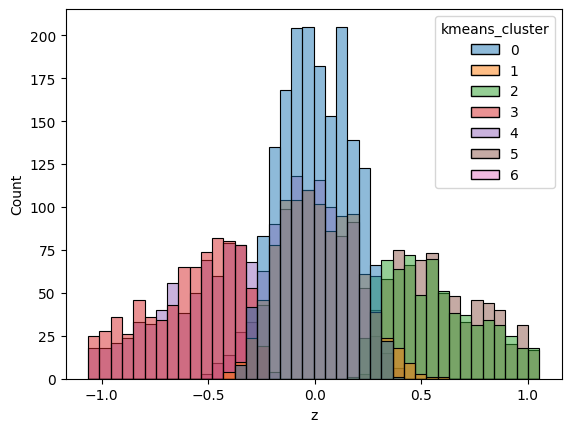

In [41]:
import seaborn as sns
sns.histplot(df_cluster1, x="z", hue='kmeans_cluster')

<Axes: xlabel='vz', ylabel='Count'>

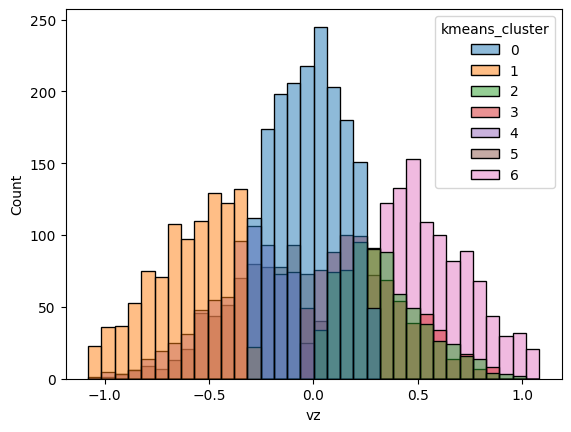

In [42]:
sns.histplot(df_cluster1, x="vz", hue='kmeans_cluster')

<Axes: xlabel='z', ylabel='kmeans_cluster'>

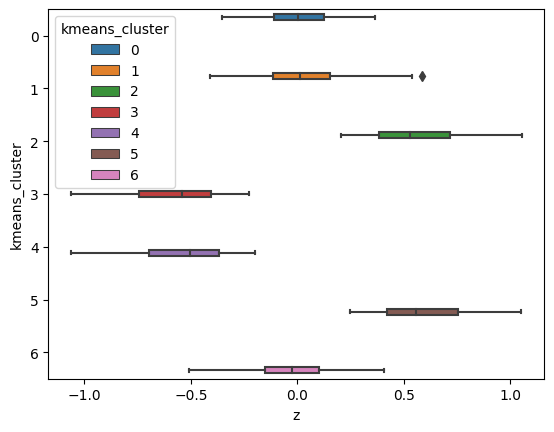

In [43]:
sns.boxplot(df_cluster1, x="z", y="kmeans_cluster", hue='kmeans_cluster')

<Axes: xlabel='vz', ylabel='kmeans_cluster'>

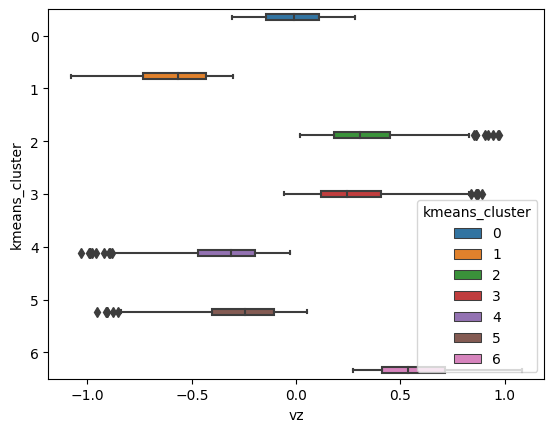

In [44]:
sns.boxplot(df_cluster1, x="vz", y="kmeans_cluster", hue='kmeans_cluster')

In [45]:
df_cluster1['dbscan_labels'] = dbscan.labels_
df_cluster1['dbscan_labels'] = df_cluster1.dbscan_labels.astype('category')
df_cluster1

<ipython-input-45-612c2ed2ffd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1['dbscan_labels'] = dbscan.labels_
<ipython-input-45-612c2ed2ffd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1['dbscan_labels'] = df_cluster1.dbscan_labels.astype('category')


,z,vz,kmeans_cluster,dbscan_labels
14648,0.332411,-0.449706,5,0
29646,-0.382865,0.118361,3,0
3466,-0.143908,-0.772410,1,0
18635,-0.040746,0.659820,6,0
63941,-0.144118,0.762089,6,0
...,...,...,...,...
59420,-0.115577,0.663913,6,0
8893,-0.069622,0.507330,6,0
41260,-0.651808,0.389885,3,0
56385,0.051942,-0.082059,0,0


In [46]:
uniq_labels = tuple(set(dbscan.labels_))
print(uniq_labels)

(0, 1, 2, 3, 4, 5, -1)


In [47]:
df_cluster1[["z", "vz", 'dbscan_labels']].groupby('dbscan_labels').describe()

z                                                    \
                count      mean       std       min       25%       50%   
dbscan_labels                                                             
-1               72.0 -0.015391  0.785002 -1.063581 -0.799610 -0.059866   
0              6630.0 -0.004754  0.412673 -1.062514 -0.250249 -0.009408   
1                 8.0 -0.420262  0.049501 -0.487770 -0.458422 -0.423040   
2                 9.0 -0.766662  0.034484 -0.818301 -0.790536 -0.768939   
3                 5.0 -0.248788  0.024480 -0.286217 -0.258261 -0.242724   
4                 4.0 -1.009940  0.035927 -1.042246 -1.040075 -1.011935   
5                 4.0  0.900748  0.026961  0.863870  0.889629  0.907166   

                                       vz                                \
                    75%       max   count      mean       std       min   
dbscan_labels                                                             
-1             0.791388  1.050150    72.0  0.043062  0.848285 -1.047869   
0              0.241464  1.052892  6630.0 -0.007284  0.416718 -1.079579   
1             -0.386733 -0.343592     8.0  0.960171  0.027929  0.906905   
2             -0.750191 -0.708317     9.0  0.770784  0.036352  0.701921   
3             -0.232597 -0.224141     5.0  1.030658  0.027087  0.998659   
4             -0.981801 -0.973645     4.0 -0.673396  0.014993 -0.686821   
5              0.918286  0.924789     4.0  0.714212  0.023440  0.697077   

                                                       
                    25%       50%       75%       max  
dbscan_labels                                          
-1            -0.876388  0.520101  0.864247  1.077838  
0             -0.299860 -0.002057  0.289547  1.081258  
1              0.954121  0.958488  0.975031  0.999812  
2              0.751371  0.778865  0.783247  0.827776  
3              1.015542  1.030308  1.037719  1.071062  
4             -0.685942 -0.674441 -0.661896 -0.657881  
5              0.699277  0.705848  0.720783  0.748073

<Axes: xlabel='z', ylabel='Count'>

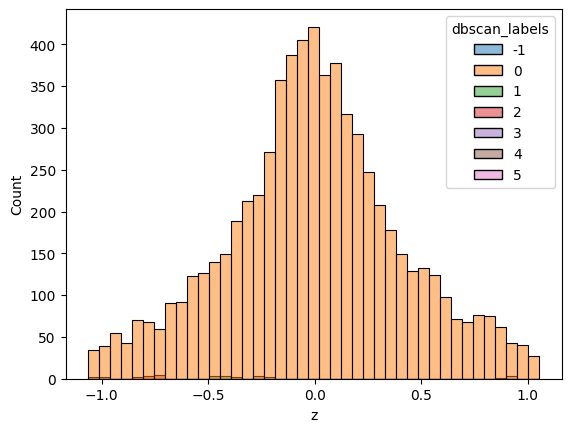

In [48]:
import seaborn as sns
sns.histplot(data=df_cluster1[df_cluster1.dbscan_labels != -1], x="z", hue='dbscan_labels')

<Axes: xlabel='vz', ylabel='Count'>

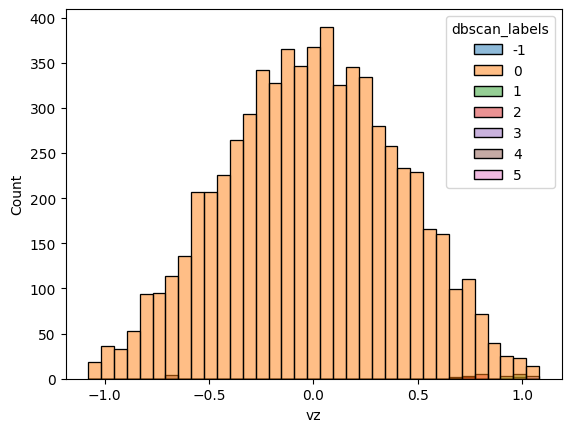

In [49]:
sns.histplot(data=df_cluster1[df_cluster1.dbscan_labels != -1], x="vz", hue='dbscan_labels')

<Axes: xlabel='z', ylabel='dbscan_labels'>

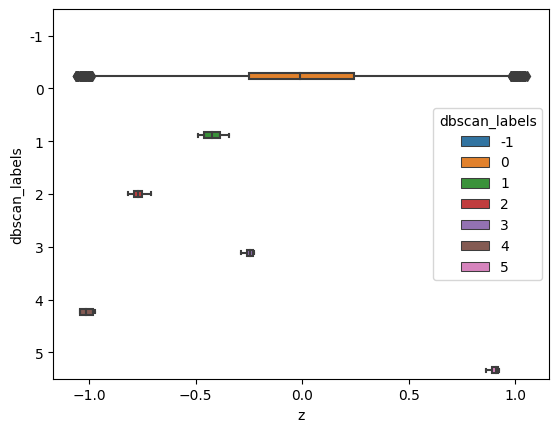

In [50]:
sns.boxplot(df_cluster1[df_cluster1.dbscan_labels != -1], x="z", y="dbscan_labels", hue='dbscan_labels')

<Axes: xlabel='vz', ylabel='dbscan_labels'>

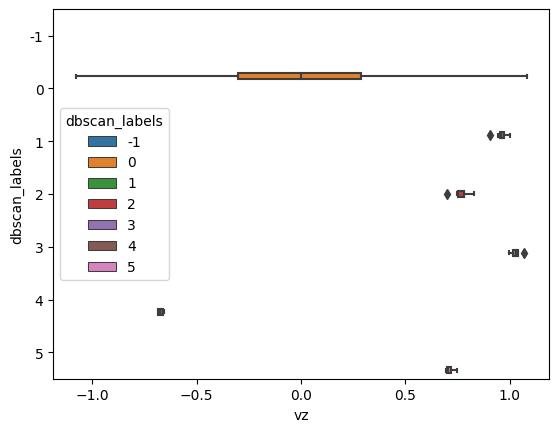

In [51]:
sns.boxplot(data=df_cluster1[df_cluster1.dbscan_labels != -1], x="vz", y="dbscan_labels", hue='dbscan_labels')